In [1]:
from transformers import pipeline
from sklearn.metrics import confusion_matrix
import pickle
from metrics_wrapper import MetricsWrapper
from metrics_wrapper import ChatGPTMetricsWrapper
from metrics_wrapper import ThreeWayConfMatrix

# Familjeliv

precision: 0.24
recall: 0.43
f1_score: 0.30


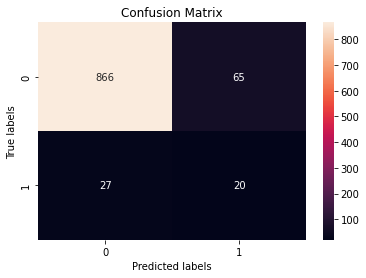

In [2]:
with open("metrics/familjeliv_chatgpt_metrics.pkl", "rb") as f:
    familjeliv_chatgpt_metrics = pickle.load(f)
familjeliv_chatgpt_metrics.display_metrics()

precision: 0.18
recall: 0.57
f1_score: 0.27


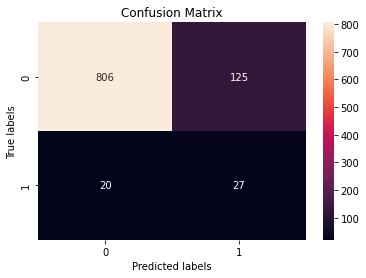

In [3]:
with open("metrics/familjeliv_automatic_metrics.pkl", "rb") as f:
    familjeliv_automatic_metrics = pickle.load(f)
familjeliv_automatic_metrics.display_metrics()

precision: 0.27
recall: 0.38
f1_score: 0.32


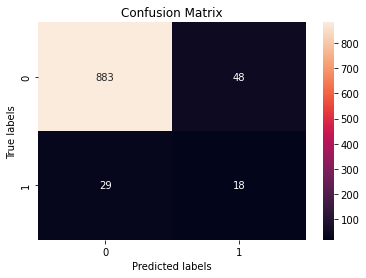

In [4]:
with open("metrics/familjeliv_annotated_metrics.pkl", "rb") as f:
    familjeliv_annotated_metrics = pickle.load(f)
familjeliv_annotated_metrics.display_metrics()

In [5]:
# just to make sure that y_true is identical in all cases (it should!)
assert [x[1] for x in familjeliv_annotated_metrics.metrics["predictions"]] == [x[1] for x in familjeliv_chatgpt_metrics.metrics["predictions"]]
assert [x[1] for x in familjeliv_automatic_metrics.metrics["predictions"]] == [x[1] for x in familjeliv_chatgpt_metrics.metrics["predictions"]]
print("a okay!")

a okay!


In [6]:
y_true = [x[1] for x in familjeliv_chatgpt_metrics.metrics["predictions"]]

## Annotated model / ChatGPT

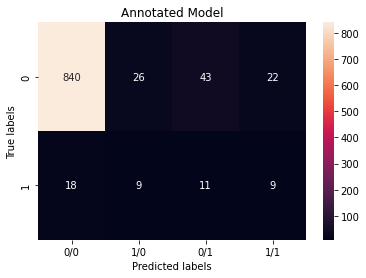

In [7]:
annotated_y_pred = [x[2] for x in familjeliv_annotated_metrics.metrics["predictions"]]
chatgpt_y_pred = [x[2] for x in familjeliv_chatgpt_metrics.metrics["predictions"]]

annotated_cm3 = ThreeWayConfMatrix(annotated_y_pred, chatgpt_y_pred, y_true, title="Annotated Model")
annotated_cm3.display()

Successfully saved plot to cm3_annotated.png


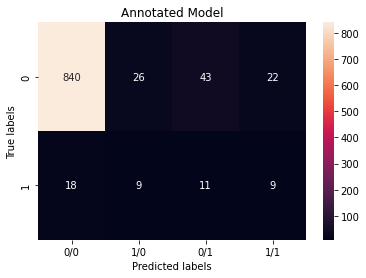

In [8]:
annotated_cm3.save_cm_to_disk("cm3_annotated.png")

### Analysis of the discrepancies annotated model/ChatGPT

In [ ]:
for i in [familjeliv_annotated_metrics.metrics["predictions"][x][0] for x in annotated_cm3.idx_list[1][1]]:
    print(i)
    print("### POST DIVIDER ###")

The numerical pairs are the two different baselines, the first one is the annotated model, while the latter is the annotations in virtue of ChatGPT. All blockquotes are paraphrased posts from swedish, both to translate them, but mostly to obfuscate any identifying details of the post.


#### **TRUE LABEL 0**

#### 0/0

Not very interesting. Skipping for now.

#### 1/0

There are some lexical triggers here, which probably makes the annotated model infer HS.

> I believe in the holocaust and I do not hate jews. Just stop with assuming that we're all like that, it's just distasteful.

#### 0/1

Especially posts involving paraphrasing, i.e. they *think* this, seems to be labelled HS.

> I guess that's fine, seeing how so many men think that feminists are unfeminine and undateable, i.e. one less thing to think about.

> "If my wife had done that, then she would never get in the house again. A woman that acts so irrational is neither a good partner or a fit mother." Is that what you are saying to OP?

#### 1/1

A combination of lexical triggers and semantic paraphrasing; like when the poster quotes the standpoint of OP.

> That's exactly what all your threads are about: all women are SUPPOSED to want to fuck you, everything else is unfair and harassment.

#### **TRUE LABEL 1**

#### 0/0

An interesting mix here. Some don't have obvious lexical triggers, while others simply report facts (which in the context of the thread makes them hate speech).

> If you're a proponent of structural racism then you without a doubt possess one of humanity's repulsive sides.

#### 1/0

Honestly, these are very difficult, and mostly are situated on the border of hate speech/non-hate speech. 

> But please, can't somebody help this wretched, confused manbaby?

#### 0/1

I'm not sure why the annotated classifier performed so poorly on some of these, seeing that they not only contain lexical triggers but also discuss semantically similar topics. It could be because they lack a lot of the "real world knowledge" contained in LLMs like ChatGPT.

> They are infected by the ideology called 'feminism'. Only do what feels right in the moment and don't give a fuck about the consequences.

> The Quran is much worse than Mein Kampf, so no, Muslims aren't as dangerous as Hitler. They're much more dangerous.

#### 1/1

Mostly obvious cases of hate speech, containing lexical triggers.

> Exactly, within muslim ranks there are many islamists who are sent down to the middle east to kill us.

## Automatic model / ChatGPT

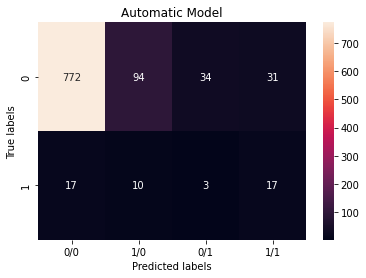

In [9]:
y_pred_automatic = [x[2] for x in familjeliv_automatic_metrics.metrics["predictions"]]
y_pred_chatgpt = [x[2] for x in familjeliv_chatgpt_metrics.metrics["predictions"]]
y_true = [x[1] for x in familjeliv_chatgpt_metrics.metrics["predictions"]]

automatic_cm3 = ThreeWayConfMatrix(y_pred_automatic, y_pred_chatgpt, y_true, title="Automatic Model")
automatic_cm3.display()

Successfully saved plot to cm3_automatic.png


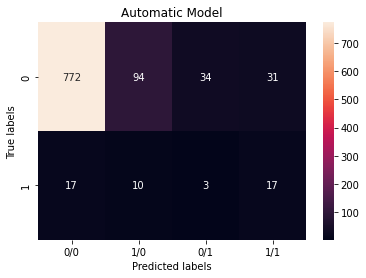

In [14]:
automatic_cm3.save_cm_to_disk("cm3_automatic.png")

### Analysis of the discrepancies automatic model/ChatGPT

In [ ]:
for i in [familjeliv_chatgpt_metrics.metrics["predictions"][x][0] for x in automatic_cm3.idx_list[1][3]]:
    print(i)
    print("### POST DIVIDER ###")

#### **TRUE LABEL 0**

#### 0/0

Not very interesting. Skipping for now.

#### 1/0

These are most probably the result of the automatic classifier being too sensitive, to the point where even the briefest mention of a "hate speech"-predictive word is enough to skew some examples to a HS label.

> Who the fuck is Jesus?

#### 0/1

Paraphrasing hate speech, or telling hate speech users off seem to be a recurring theme.

> Wow, not only misognistic and anti-feminist, but homophobic as well. Well done for a monday afternoon.

#### 1/1

Similar to the annotated model, they get confused when it comes to sentences which are talking about entire groups, but not in hateful manner. I could, for example, say that "I don't think feminists currently care about equality" without it being labelled as hate speech.

#### **TRUE LABEL 1**

#### 0/0

Some don't have obvious lexical cues, nor semantic content.

> You ask me whether I prefer a mentally ill gangster or a senile pervert as president, to which I say no to both.

#### 1/0

These are, I think, mostly because the automatic classifier is so sensitive to hate speech in comparison (which leads to a lot of false positives)

> If you have an IQ of over 50 then it is impossible to be brainwashed by a feminist.

#### 0/1

Very few in number (because the automatic classifier is very sensitive), but the ones that occur are seemingly in virtue of very rare wording of that particular phrase;

> Of course they are; often poorly educated, with some useless gender studies degree; but most often they're low-income trash complaining that they aren't rich.

#### 1/1

Mostly obvious cases of hate speech; both in regards to lexical cues and semantic content.

## Comparing the automatic and annotated model 

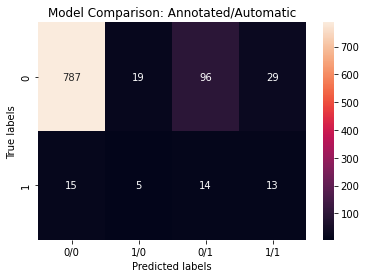

In [12]:
automatic_y_pred = [x[2] for x in familjeliv_automatic_metrics.metrics["predictions"]]
annotated_y_pred = [x[2] for x in familjeliv_annotated_metrics.metrics["predictions"]]
y_true = [x[1] for x in familjeliv_annotated_metrics.metrics["predictions"]]

baselines_cm3 = ThreeWayConfMatrix(annotated_y_pred, automatic_y_pred, y_true, title="Model Comparison: Annotated/Automatic")
baselines_cm3.display()

Successfully saved plot to cm3_baselines.png


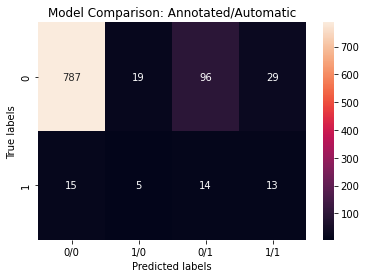

In [13]:
baselines_cm3.save_cm_to_disk("cm3_baselines.png")

### Looking at discrepancies

In [ ]:
for i in [familjeliv_automatic_metrics.metrics["predictions"][x][0] for x in baselines_cm3.idx_list[1][2]]:
    print(i)
    print("### POST DIVIDER ###")

#### **TRUE LABEL 0**

#### 0/0

Again, not really that interesting --- and way too much data to sift through.

#### 1/0

Paraphrasing of the intention of other posters, etc.

#### 0/1

Very similar to the automatic/ChatGPT analysis --- the automatic version is much too sensitive, and ascribes too much weight to certain words in virtue of their predictive quality to HS.

#### 1/1

As previously for the ChatGPT thingy, in this category we see some really difficult ones, including paraphrasing etc.

> My Christian friends have married away their daughters so that they don't have to choose their partner themselves; as well as hating on Muslims, Jews, Homosexuals, etc... [said in a facetious context]

#### **TRUE LABEL 1**

#### 0/0

Also similar to the whole ChatGPT situation, in that these depend on things like real-world knowledge and specific context-dependent interpretations.

#### 1/0

I'm surprised that some of these aren't picked up by the automatic classifier (like the manbaby post previously talked about).

#### 0/1

These, I think, are mostly in virtue of the fact that the automatic classifier simply is much more sensitive to the lexical occurance of predictive words.

#### 1/1

Not too interesting, mostly obvious cases.